In [4]:
import pandas as pd
from bs4 import BeautifulSoup
from contextlib import contextmanager 
from io import BytesIO 
from tempfile import NamedTemporaryFile 
from transformers import PretrainedConfig, PreTrainedModel 
from transformers import set_seed
from transformers import AdamW, BertForSequenceClassification, BertTokenizer, AutoTokenizer
from transformers import TextClassificationPipeline
from tqdm import tqdm
import json
import torch
import boto3
from psycopg2.extras import RealDictCursor
import psycopg2
import boto3
from psycopg2 import sql
from datetime import datetime
import json
import utils
import pandas as pd
import pathlib
import csv
import requests
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr



In [5]:
%%capture
all35 = []
all15 = []
aqmeetings = []
city_name = []

for i in range(0,9):
    city_input = i
    print(i)
    %run ./analysis.ipynb
    all35.append(percent35)
    all15.append(percent15)
    aqmeetings.append(len(df_aq))
    city_name.append(city)



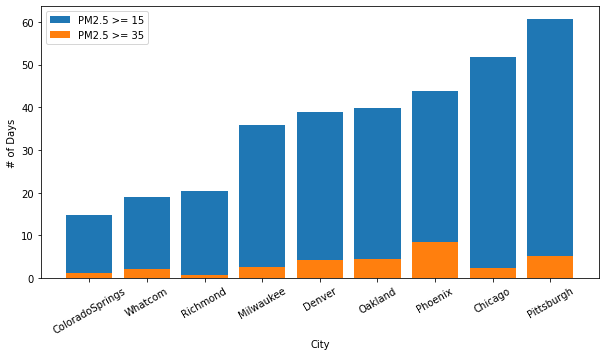

In [10]:
dict15 = dict(zip(city_name,all15))
dict35 = dict(zip(city_name,all35))
sorted_values15 = sorted(dict15.values()) # Sort the values
sorted_dict15 = {}
for i in sorted_values15:
    for k in dict15.keys():
        if dict15[k] == i:
            sorted_dict15[k] = dict15[k]
            break


sorted_values35 = sorted(dict35.values()) # Sort the values
sorted_dict35 = {}
for i in sorted_values35:
    for k in dict35.keys():
        if dict35[k] == i:
            sorted_dict35[k] = dict35[k]
            break

plt1 = plt.bar(sorted_dict15.keys(),sorted_dict15.values())
plt1 = plt.bar(sorted_dict35.keys(),sorted_dict35.values())
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation = 30)
plt.xlabel("City")
plt.ylabel("# of Days")
plt.legend(["PM2.5 >= 15","PM2.5 >= 35"])
print("")



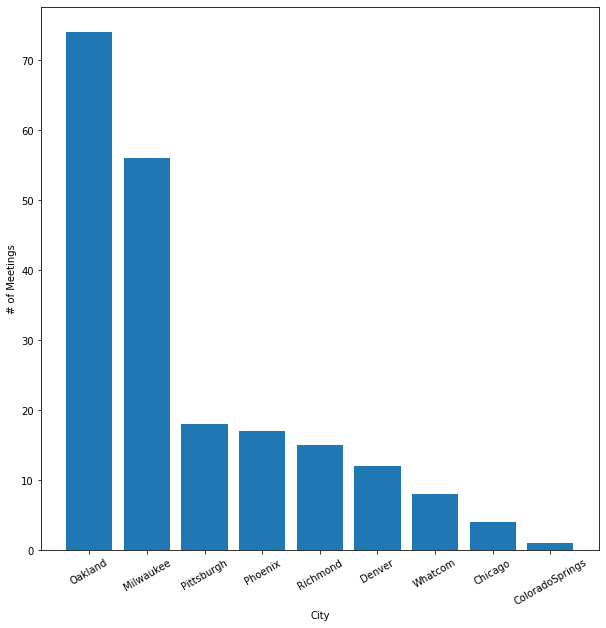

In [11]:

dictaq = dict(zip(city_name,aqmeetings))
sorted_valuesaq = sorted(dictaq.values(),reverse=True) # Sort the values
sorted_dictaq = {}
for i in sorted_valuesaq:
    for k in dictaq.keys():
        if dictaq[k] == i:
            sorted_dictaq[k] = dictaq[k]
            break

plt.bar(sorted_dictaq.keys(),sorted_dictaq.values())
plt.rcParams['figure.figsize']=(10,5)
plt.xticks(rotation = 30)
plt.xlabel("City")
plt.ylabel("# of Meetings")
print("")


Pearsons correlation for days with PM2.5 > 15 and # of AQ Meetings: 0.175
Pearsons correlation for days with PM2.5 > 35 and # of AQ Meetings: 0.190


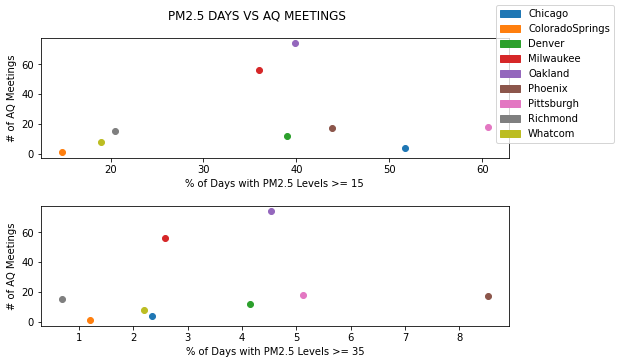

In [12]:
fig, axs = plt.subplots(2)
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.85, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('PM2.5 DAYS VS AQ MEETINGS')
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']
patch=[]
for i in range(0,9):
    axs[0].scatter(all15[i], aqmeetings[i],c=colors[i])
    axs[1].scatter(all35[i], aqmeetings[i])
    patch.append(mpatches.Patch(color=colors[i], label=city_name[i]))

axs[0].set_xlabel("% of Days with PM2.5 Levels >= 15")
axs[1].set_xlabel("% of Days with PM2.5 Levels >= 35")
axs[0].set_ylabel("# of AQ Meetings")
axs[1].set_ylabel("# of AQ Meetings")
fig.legend(handles=[patch[0], patch[1],patch[2], patch[3],patch[4], patch[5],patch[6], patch[7], patch[8]])
plt.rcParams['figure.figsize']=(10,5)
corr15, _ = pearsonr(all15, aqmeetings)
print('Pearsons correlation for days with PM2.5 > 15 and # of AQ Meetings: %.3f' % corr15)
corr35, _ = pearsonr(all35, aqmeetings)
print('Pearsons correlation for days with PM2.5 > 35 and # of AQ Meetings: %.3f' % corr35)

In [9]:
print("Ranking cities from best to worst air quality:")
i=1
for key in sorted_dict15.keys():
    print(str(i)+". "+key)
    i += 1

print("\n")
i=1
print("Ranking cities from most to least air quality meetings:")
for key in sorted_dictaq.keys():
    print(str(i)+". "+key)
    i += 1

print("\n")
if corr15 < 0.5 and corr15 >= -0.5 and corr35 < 0.5 and corr35 >= -0.5:
    print("There is a weak correlation between the number of meetings and air quality.")
    print("Therefore, we can deduce from our data and analysis that there no is direct relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
elif corr15 >= 0.5 and corr35 >= 0.5:
    print("There is a strong correlation between the number of meetings and air quality.")
    print("Therefore, we can deduce from our data and analysis that there is a direct and postive relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
elif corr15 <= -0.5 and corr35 <= -0.5:
    print("There is a strong correlation between the number of meetings and air quality.")
    print("Therefore, we can deduce from our data and analysis that there is a direct and negative relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
elif corr15 >= 0.5:
    print("There is a strong correlation between the number of meetings and PM2.5 Levels >= 15.")
    print("Therefore, we can deduce from our data and analysis that there is a direct and positive relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
elif corr15 <= -0.5:
    print("There is a strong correlation between the number of meetings and PM2.5 Levels >= 15.")
    print("Therefore, we can deduce from our data and analysis that there is a direct and negative relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
elif corr35 >= 0.5:
    print("There is a strong correlation between the number of meetings and PM2.5 Levels >= 35.")
    print("Therefore, we can deduce from our data and analysis that there is a direct and positive relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
elif corr35 <= -0.5:
    print("There is a strong correlation between the number of meetings and PM2.5 Levels >= 35.")
    print("Therefore, we can deduce from our data and analysis that there is a direct and negative relationship between the number of times AQ is bought up in city meetings and the AQ of that city.")
    
    

Ranking cities from best to worst air quality:
1. ColoradoSprings
2. Whatcom
3. Richmond
4. Milwaukee
5. Denver
6. Oakland
7. Phoenix
8. Chicago
9. Pittsburgh


Ranking cities from most to least air quality meetings:
1. Oakland
2. Milwaukee
3. Pittsburgh
4. Phoenix
5. Richmond
6. Denver
7. Whatcom
8. Chicago
9. ColoradoSprings


There is a weak correlation between the number of meetings and air quality.
Therefore, we can deduce from our data and analysis that there no is direct relationship between the number of times AQ is bought up in city meetings and the AQ of that city.
